# Python中的因子分析简介

https://www.datacamp.com/community/tutorials/introduction-factor-analysis

在本教程中，您将介绍以下主题：

* 因子分析

* 因子分析的类型

* 确定因素数量

* 因子分析与 主成分分析

* python中的因子分析

* 充分性测试

* 解释结果

* 因子分析的利弊

* 结论

## 因子分析

因子分析是一种线性统计模型。它用于解释观察变量之间的差异，并将一组观察到的变量压缩到称为因子的未观察变量中。观察到的变量被建模为因子和误差项的线性组合（来源）。因子或潜在变量与多个观察到的变量相关联，这些变量具有共同的响应模式。每个因素都解释了观察到的变量中的特定方差量。它通过减少变量的数量来帮助进行数据解释。

![](https://res.cloudinary.com/dchysltjf/image/upload/f_auto,q_auto:best/v1554830324/6.png)

因子分析是用于研究许多感兴趣的变量X1，X2，......，X1是否与较少数量的不可观察因子F1，F2，... ......，Fk线性相关的方法。

![](https://res.cloudinary.com/dchysltjf/image/upload/f_auto,q_auto:best/v1554830233/1.png)

来源：此图像是从我在因子分析说明中找到的图像重新创建的。该图像提供了因子分析的完整视图。

假设：

1 数据中没有异常值。

2 样本量应大于因子。

3 不应该有完美的多重共线性。

4 变量之间不应该存在同方差性。

## 因子分析的类型

* 探索性因子分析：它是社会和管理研究人员中最受欢迎的因子分析方法。其基本假设是任何观察到的变量都与任何因素直接相关。

* 验证性因子分析（CFA）：其基本假设是每个因子都与一组特定的观察变量相关联。CFA确认了基本的预期。

### 因子分析如何运作？

因子分析的主要目标是减少观察到的变量的数量并找到不可观察的变量。这些未观察到的变量有助于市场研究人员完成调查。将观察到的变量转换为未观察到的变量可以通过两个步骤实现：

* 因子提取：在此步骤中，使用方差分割方法（如主成分分析和公因子分析）选择因子数和提取方法。

* 因素轮换：在此步骤中，轮换会尝试将因子转换为不相关的因素 - 这一步骤的主要目标是提高整体可解释性。有许多可用的旋转方法，例如：Varimax旋转方法，Quartimax旋转方法和Promax旋转方法。


### 术语

#### 有什么因素？

因子是潜在变量，其描述了观察到的变量的数量之间的关联。最大因子数等于观察到的变量数。每个因素都解释了观察到的变量的某种变化。方差量最小的因素被删除。因素也称为潜在变量或隐藏变量或未观察到的变量或假设变量。

#### 因素负荷是什么？

因子加载是一个矩阵，显示每个变量与基础因子的关系。它显示了观测变量和因子的相关系数。它显示了由观察到的变量解释的方差。

#### 什么是特征值？

特征值表示方差，从总方差中解释每个因子。它也被称为特征根。


#### 什么是社区？

共性是每个变量的平方加载的总和。它代表了常见的差异。范围从0到1，值接近1表示更多方差。

![](https://res.cloudinary.com/dchysltjf/image/upload/f_auto,q_auto:best/v1554830233/2.png)


#### 什么是因素轮换？

轮换是更好地解释因子分析的工具。旋转可以是正交的或倾斜的。它以明确的负载模式重新分配了共性。


### 选择因素数量

Kaiser准则是一种分析方法，它基于因子选择的更大比例的方差来选择。特征值是确定因子数量的良好标准。通常，大于1的特征值将被视为特征的选择标准。


图形方法基于因子特征值的视觉表示，也称为scree图。这个碎石图有助于我们确定曲线弯曲的因素数量。

![](https://res.cloudinary.com/dchysltjf/image/upload/f_auto,q_auto:best/v1554830233/3.png)

## 因子分析与 主成分分析

* PCA组件解释了最大的方差量，而因子分析解释了数据的协方差。

* PCA组分彼此完全正交，而因子分析不要求因子是正交的。

* PCA组分是观察到的变量的线性组合，而在FA中，观察到的变量是未观察到的变量或因子的线性组合。

* PCA组件无法解释。在FA中，潜在因素是可以理解和可解释的。

* PCA是一种降维方法，而因子分析是潜变量方法。

* PCA是一种因子分析。PCA是观察性的，而FA是一种建模技术。


![](https://res.cloudinary.com/dchysltjf/image/upload/f_auto,q_auto:best/v1554830233/4.png)

## 使用factor_analyzer包在python中进行因子分析

### 导入所需的库

In [1]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [2]:
import pkg_resources

In [3]:
pkg_resources.get_distribution("factor_analyzer").version

'0.3.1'

## 加载数据

让我们对BFI（基于人格评估项目的数据集）进行因子分析，这是使用6点响应量表收集的：1非常不准确，2中度不准确，3略微不准确4准确，5中等准确，6非常准确。
您还可以从以下链接下载此数据集：https://vincentarelbundock.github.io/Rdatasets/datasets.html

In [4]:
df= pd.read_csv("avg_CCNnew41.8-spss.csv")

### 预处理数据

In [5]:
df.columns

Index(['CCN_1.0_cm3', 'CAPE_nc', 'Cloud_fra', 'HGT', 'H_LCL_nc', 'Have',
       'Hcb1.0', 'Hcbs1.0', 'Hmax', 'Hmin', 'Hsd', 'Htop1.0', 'L/S', 'LSM',
       'LTS', 'PBLH', 'PR', 'PTEM700', 'PTEMS', 'PW', 'P_LCL_nc', 'Pcb1.0',
       'Press', 'Ptop1.0', 'RH2', 'RH2m', 'Recb1.0', 'Retop1.0', 'SLI',
       'SS_1.0_mg', 'T1000', 'T2m_NCEP', 'T500', 'T700', 'T850', 'TOZONE',
       'T_LCL_nc', 'T_coal1.0', 'Tcb1.0', 'Tsfc_NPP', 'Ttop1.0', 'Wb_1.0',
       'FAC1', 'FAC2', 'FAC3', 'FAC4', 'FAC5', 'FAC6', 'FAC7', 'FAC8'],
      dtype='object')

In [6]:
# Dropping unnecessary columns
# NOTICE BJC is Time value
df.drop(['FAC1', 'FAC2', 'FAC3', 'FAC4', 'FAC5', 'FAC6', 'FAC7', 'FAC8'],axis=1,inplace=True)

In [7]:
df.drop(['CCN_1.0_cm3'],axis=1,inplace=True)

In [8]:
df.shape

(76936, 41)

In [9]:
# Dropping missing values rows
df.dropna(inplace=True)

In [10]:
df.shape

(75966, 41)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75966 entries, 0 to 76935
Data columns (total 41 columns):
CAPE_nc      75966 non-null float64
Cloud_fra    75966 non-null float64
HGT          75966 non-null float64
H_LCL_nc     75966 non-null float64
Have         75966 non-null float64
Hcb1.0       75966 non-null float64
Hcbs1.0      75966 non-null float64
Hmax         75966 non-null float64
Hmin         75966 non-null float64
Hsd          75966 non-null float64
Htop1.0      75966 non-null float64
L/S          75966 non-null float64
LSM          75966 non-null float64
LTS          75966 non-null float64
PBLH         75966 non-null float64
PR           75966 non-null float64
PTEM700      75966 non-null float64
PTEMS        75966 non-null float64
PW           75966 non-null float64
P_LCL_nc     75966 non-null float64
Pcb1.0       75966 non-null float64
Press        75966 non-null float64
Ptop1.0      75966 non-null float64
RH2          75966 non-null float64
RH2m         75966 non-null

In [12]:
df.head()

,CAPE_nc,Cloud_fra,HGT,H_LCL_nc,Have,Hcb1.0,Hcbs1.0,Hmax,Hmin,Hsd,...,T500,T700,T850,TOZONE,T_LCL_nc,T_coal1.0,Tcb1.0,Tsfc_NPP,Ttop1.0,Wb_1.0
0,2121.000000,0.039450,632.000000,694.600000,567.000000,2006.000000,1384.000000,1336.500000,159.500000,213.000000,...,-4.45,11.85,20.85,283.1,21.900000,17.500000,17.500000,31.000000,-19.0,1.245000
1,2048.666667,0.064533,720.666667,731.533333,440.333333,1545.333333,1225.666667,1089.666667,84.333333,209.666667,...,-4.45,11.85,20.85,283.1,21.166667,19.666667,20.333333,33.666667,-5.0,1.106667
2,1904.000000,0.049100,898.000000,805.400000,510.000000,1510.000000,1140.000000,1231.500000,40.000000,273.500000,...,-4.85,11.85,20.35,283.1,19.700000,20.500000,20.500000,34.500000,2.0,1.025000
3,1904.000000,0.018600,898.000000,805.400000,380.000000,1391.000000,1172.000000,1262.000000,4.000000,231.000000,...,-4.85,11.85,20.35,283.1,19.700000,21.000000,21.000000,35.000000,5.0,1.060000
4,2121.000000,0.204500,632.000000,694.600000,454.000000,1441.000000,1099.000000,1128.000000,131.000000,209.000000,...,-4.25,11.45,19.85,279.3,21.900000,20.000000,20.000000,32.000000,-5.0,0.990000


## 充分性测试
在执行因子分析之前，您需要评估数据集的“可用性”。Factorability意味着“我们能找到数据集中的因子吗？”。有两种方法可以检查可行性或抽样充分性：

* 巴特利特的考验
* Kaiser-Meyer-Olkin测试

**Bartlett**对球形度的检验使用观察到的相对矩阵对照单位矩阵检查观察到的变量是否完全相互关联。如果测试发现统计上不显着，则不应使用因子分析。

In [13]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(9873368.8146522213, 0.0)

在该Bartlett检验中，p值为0.该检验具有统计学意义，表明观察到的相关矩阵不是单位矩阵。

**Kaiser-Meyer-Olkin（KMO）测试**测量数据在因子分析中的适用性。它确定了每个观测变量和完整模型的充分性。
KMO估计所有观测变量之间的方差比例。较低的比例id更适合因子分析。KMO值介于0和1之间.KMO小于0.6的值被认为是不合适的。

In [14]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [15]:
kmo_model

0.89388322189054104

我们数据的总体KMO为0.84，非常好。此值表示您可以继续进行计划的因子分析。

### 选择因素数量
要选择因子数，可以使用Kaiser标准和scree图。两者都基于特征值。

In [18]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation=None)
fa.fit(df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([  1.60945618e+01,   7.34511698e+00,   4.62451534e+00,
         2.86644516e+00,   2.22114487e+00,   1.61236721e+00,
         1.13592263e+00,   8.26312123e-01,   8.14208321e-01,
         6.22735704e-01,   5.33514951e-01,   3.11810331e-01,
         2.64513752e-01,   2.38908043e-01,   2.28581168e-01,
         1.93560247e-01,   1.80805877e-01,   1.55105324e-01,
         1.12926109e-01,   1.10085465e-01,   9.11157163e-02,
         8.20189911e-02,   6.70944708e-02,   5.32676235e-02,
         4.98749979e-02,   4.10087152e-02,   3.02434816e-02,
         2.41333746e-02,   1.92367260e-02,   1.46299134e-02,
         9.74888662e-03,   9.31026043e-03,   4.74138624e-03,
         3.83795412e-03,   3.27283353e-03,   1.78767039e-03,
         1.23057338e-03,   2.96032806e-04,   8.64447171e-06,
         2.74568420e-07,   8.59938083e-08])

在这里，您只能看到6个因子的特征值大于1。这意味着我们只需要选择6个因子（或未观察到的变量）。

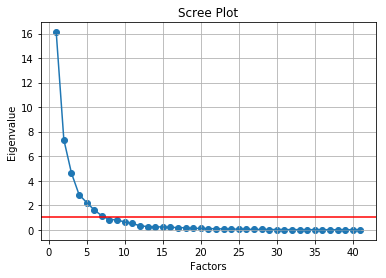

In [19]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='-')
plt.grid()
plt.show()

碎石图方法为每个因子及其特征值绘制一条直线。特征值大于1被认为是因子的数量。

在这里，您只能看到6个因子的特征值大于1。这意味着我们只需要选择6个因子（或未观察到的变量）。

## 执行因子分析

# Create factor analysis object and perform factor analysis

### for 0.2.3
fa = FactorAnalyzer()
fa.analyze(df, 6 ,rotation="varimax")

In [21]:
fav= FactorAnalyzer(n_factors=6,rotation="varimax")

In [23]:
fav.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=6, rotation='varimax',
        rotation_kwargs={}, use_smc=True)

In [25]:
fav.loadings_

array([[-0.09864597,  0.58252538, -0.31294482, -0.17639762,  0.03164659,
        -0.22977933],
       [-0.31306824, -0.20207654,  0.15228118,  0.04895386,  0.32551142,
         0.23716174],
       [ 0.27067552, -0.15636809,  0.20592195,  0.85676912,  0.06313919,
         0.22294375],
       [ 0.88877137, -0.12537137,  0.24015488,  0.18824471, -0.07701828,
         0.12834315],
       [ 0.26959093, -0.16301651,  0.21639794,  0.87474185,  0.06861922,
         0.23873746],
       [ 0.03508207, -0.09165717,  0.9434651 ,  0.22439699,  0.16162165,
         0.05525086],
       [ 0.35769506, -0.07530279,  0.89083381,  0.10501551,  0.12075955,
         0.14757522],
       [ 0.14293422, -0.03819528,  0.15238263,  0.73223876,  0.07119257,
         0.5510334 ],
       [ 0.36112135, -0.22697233,  0.24086954,  0.79217992,  0.05375281,
         0.00469846],
       [-0.03061533,  0.10073213,  0.040071  ,  0.41285651,  0.06309566,
         0.58994763],
       [-0.08088894,  0.01902731,  0.21453162,  0.

* 因子1具有E1，E2，E3，E4和E5（外向）的高因子负载

* 因子2对N1，N2，N3，N4和N5具有高因子负荷（神经质）

* 因子3具有C1，C2，C3，C4和C5的高因子负载（尽责）

* 因子4对O1，O2，O3，O4和O5具有高因子负载（Opennness）

* 因子5具有A1，A2，A3，A4和A5的高因子载荷（令人满意）

* 因子6没有任何变量的高值，并且不易解释。如果我们只采取五个因素，这是好的。

让我们对5个因素进行因子分析。

In [31]:
#Calculate the eigenvalues, given the factor correlation matrix
fav.get_eigenvalues()

(array([  1.60945618e+01,   7.34511698e+00,   4.62451534e+00,
          2.86644516e+00,   2.22114487e+00,   1.61236721e+00,
          1.13592263e+00,   8.26312123e-01,   8.14208321e-01,
          6.22735704e-01,   5.33514951e-01,   3.11810331e-01,
          2.64513752e-01,   2.38908043e-01,   2.28581168e-01,
          1.93560247e-01,   1.80805877e-01,   1.55105324e-01,
          1.12926109e-01,   1.10085465e-01,   9.11157163e-02,
          8.20189911e-02,   6.70944708e-02,   5.32676235e-02,
          4.98749979e-02,   4.10087152e-02,   3.02434816e-02,
          2.41333746e-02,   1.92367260e-02,   1.46299134e-02,
          9.74888662e-03,   9.31026043e-03,   4.74138624e-03,
          3.83795412e-03,   3.27283353e-03,   1.78767039e-03,
          1.23057338e-03,   2.96032806e-04,   8.64447171e-06,
          2.74568420e-07,   8.59938083e-08]),
 array([  1.59870055e+01,   7.19607202e+00,   4.50689736e+00,
          2.73184771e+00,   2.08921407e+00,   1.33243337e+00,
          7.88006994e-01

In [26]:
# Calculate the communalities, given the factor loading matrix.
fav.get_communalities()

array([ 0.53191747,  0.32663607,  0.92786385,  0.92114675,  0.97295919,
        0.9792864 ,  0.97459071,  0.88998933,  0.87040368,  0.53515971,
        0.93489144,  0.72822187,  0.84278922,  0.92000498,  0.9036301 ,
        0.17294122,  0.93542744,  0.98676548,  0.85031602,  0.96541746,
        0.97449305,  0.9266565 ,  0.95892615,  0.92929546,  0.93141097,
        0.27096497,  0.71499743,  0.48672982,  0.74745954,  0.98954012,
        0.94512301,  0.85799398,  0.93543109,  0.8901907 ,  0.72392123,
        0.96449599,  0.82488032,  0.99266657,  0.6517211 ,  0.98164076,
        0.97457346])

In [27]:
# Get variance of each factors
fav.get_factor_variance()

(array([ 7.567382  ,  7.45721324,  6.61832715,  5.64593424,  3.78981105,
         2.76480292]),
 array([ 0.18457029,  0.18188325,  0.16142261,  0.13770571,  0.09243442,
         0.06743422]),
 array([ 0.18457029,  0.36645354,  0.52787616,  0.66558187,  0.75801629,
         0.8254505 ]))

In [30]:
#Calculate the uniquenesses, given the factor loading matrix.
fav.get_uniquenesses()

array([ 0.46808253,  0.67336393,  0.07213615,  0.07885325,  0.02704081,
        0.0207136 ,  0.02540929,  0.11001067,  0.12959632,  0.46484029,
        0.06510856,  0.27177813,  0.15721078,  0.07999502,  0.0963699 ,
        0.82705878,  0.06457256,  0.01323452,  0.14968398,  0.03458254,
        0.02550695,  0.0733435 ,  0.04107385,  0.07070454,  0.06858903,
        0.72903503,  0.28500257,  0.51327018,  0.25254046,  0.01045988,
        0.05487699,  0.14200602,  0.06456891,  0.1098093 ,  0.27607877,
        0.03550401,  0.17511968,  0.00733343,  0.3482789 ,  0.01835924,
        0.02542654])

In [33]:
#Get the factor scores for new data set.
fav.transform(df)

array([[ -1.53889168e+00,  -5.01645166e-01,  -8.99502646e-02,
         -1.09781511e-01,   2.58330338e-01,   1.04124110e+00],
       [ -1.12050854e+00,  -5.13651020e-01,  -3.84830515e-01,
         -2.48920688e-01,  -2.76369714e-01,   3.95154957e-01],
       [ -3.53064268e-01,   2.43573159e-01,  -3.63148228e-01,
          2.88975306e-01,  -5.03591129e-01,   3.49361606e-02],
       ..., 
       [ -3.48835940e+01,  -4.85002342e+01,  -3.37170138e-01,
         -3.20370961e+01,  -8.25275885e+00,  -5.18032208e-01],
       [ -3.45886881e+01,  -4.92180864e+01,  -1.57377491e-01,
         -3.33371014e+01,  -5.71730269e+00,  -7.75441259e-01],
       [  2.70875484e+00,   6.62710405e+00,  -4.92118596e-01,
          6.19584727e+00,   1.31178100e-01,   2.00454576e+00]])

In [34]:
fav.transform(df).shape

(75966, 6)

## 因子分析的利弊

因子分析探索大型数据集并找到相互关联的关联。它将观察到的变量减少为几个未观察到的变量或识别相互关联的变量组，这有助于市场研究人员压缩市场情况并找出消费者品味，偏好和文化影响之间的隐藏关系。此外，它有助于改进未来调查的调查问卷。因素可以提供更自然的数据解释。

因子分析的结果存在争议。它的解释是有争议的，因为可以对相同的数据因素进行不止一种解释。因子识别和因子命名需要领域知识。

## 结论


恭喜，您已经完成了本教程的结尾！

在本教程中，您已经了解了什么因素分析。不同类型的因子分析，因子分析如何工作，基本因子分析术语，选择因素数量，主成分分析和因子分析的比较，使用python FactorAnalyzer包在python中实现，以及因子分析的优缺点。

我期待听到任何反馈或问题。您可以通过发表评论来提出问题，我会尽力回答。

如果您想了解有关Python中的因素的更多信息，请参阅DataCamp 在Python中的无监督学习课程。

# issue
同样的问题。解决了安装先前版本的因子分析器的问题：

pip install factor_analyzer == 0.2.3

非常感谢Avinash教程。

by liuchongcn@126.com @NJU 2019-07-03

![简书](https://raw.githubusercontent.com/xigrug/xigrug.github.io/master/picture/jianshuQR1.jpg)